## K-Means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class KMeans:
    def __init__(self, init):
        self.data = np.array([(1, 2), (3, 3), (2, 2), (8, 8), (6, 6), (7, 7), (-3, -3), (-2, -4), (-7, -7)])
        self.init = init
        self.old_centroids = []
        self.new_centroids = init.copy()
        self.group = {}

    def cluster(self, display=True):
        i = 0
        while (self.new_centroids != self.old_centroids):
            self.old_centroids = self.new_centroids

            centroids = np.array(self.old_centroids)
            self.group = {}
            for each_data in self.data:
                # Vectorization Optimized    
                point = np.array(each_data)
                dist = np.sqrt(np.sum((centroids - point) ** 2, axis=1))
                group_of_each_data = np.argmin(dist)

                if (group_of_each_data not in self.group):
                    self.group[group_of_each_data] = []
                self.group[group_of_each_data].append(each_data)

                # Traditional Way
                # min_distance = 1e9
                # group_of_each_data = -1
                # for i in range(len(self.old_centroids)):
                #     current_distance = ( (self.old_centroids[i][0] - each_data[0]) ** 2 + (self.old_centroids[i][1] - each_data[1]) ** 2 ) ** 0.5
                #     if (current_distance < min_distance):
                #         group_of_each_data = i
                #         min_distance = current_distance
                
                # if (group_of_each_data not in self.group):
                #     self.group[group_of_each_data] = []

                # self.group[group_of_each_data].append(each_data)

            self.new_centroids = []
            for each in self.group.keys():
                centroid_x = sum(t[0] for t in self.group[each]) / len(self.group[each])
                centroid_y = sum(t[1] for t in self.group[each]) / len(self.group[each])
                self.new_centroids.append((centroid_x, centroid_y))
            
            i += 1

            if (display):
                print(f"--- Round {i} ---")
                print(f"Centroids: {self.new_centroids}")
        
        if (display):
            for cluster_id, points in self.group.items():
                xs, ys = zip(*points)
                plt.scatter(xs, ys, label=f"Cluster {cluster_id}")

            plt.xlabel("X")
            plt.ylabel("Y")
            plt.show()


### T5. starting points are (3,3), (2,2), and (-3,-3).

--- Round 1 ---
Centroids: [(np.float64(1.5), np.float64(2.0)), (np.float64(6.0), np.float64(6.0)), (np.float64(-4.0), np.float64(-4.666666666666667))]
--- Round 2 ---
Centroids: [(np.float64(2.0), np.float64(2.3333333333333335)), (np.float64(7.0), np.float64(7.0)), (np.float64(-4.0), np.float64(-4.666666666666667))]
--- Round 3 ---
Centroids: [(np.float64(2.0), np.float64(2.3333333333333335)), (np.float64(7.0), np.float64(7.0)), (np.float64(-4.0), np.float64(-4.666666666666667))]


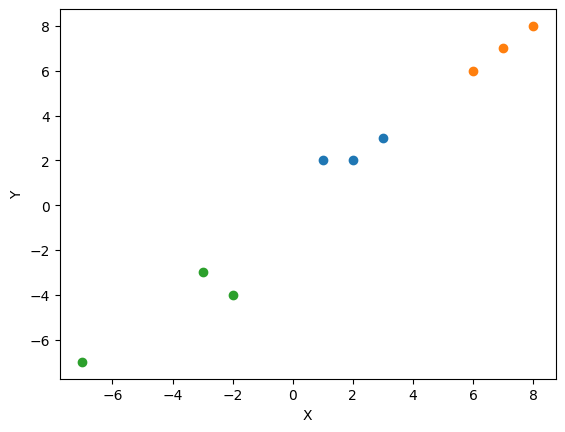

In [2]:
init_t5 = [(3, 3), (2, 2), (-3, -3)]

km_t5 = KMeans(init_t5)
km_t5.cluster()

### T6. starting points are (-3,-3), (2,2), and (-7,-7),

--- Round 1 ---
Centroids: [(np.float64(4.5), np.float64(4.666666666666667)), (np.float64(-2.5), np.float64(-3.5)), (np.float64(-7.0), np.float64(-7.0))]
--- Round 2 ---
Centroids: [(np.float64(4.5), np.float64(4.666666666666667)), (np.float64(-2.5), np.float64(-3.5)), (np.float64(-7.0), np.float64(-7.0))]


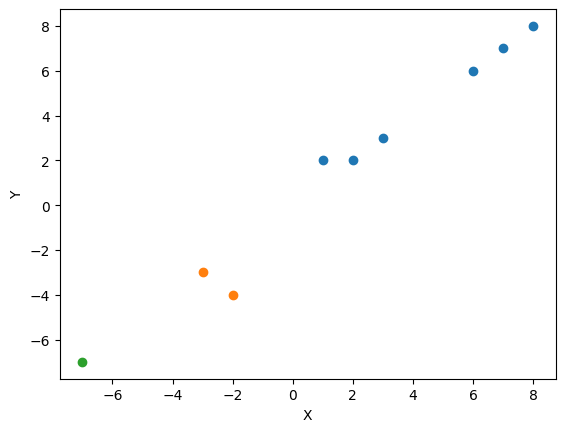

In [3]:
init_t6 = [(-3, -3), (2, 2), (-7, -7)]

km_t6 = KMeans(init_t6)
km_t6.cluster()

### T7. Between the two starting set of points in the previous two questions, which one do you think is better? How would you measure the ‘goodness’ quality of a set of starting points?
### In general, it is important to try different sets of starting points when doing k-means.

    For me, the better one is the first one. The 'goodness' may measure with the variance in the group

### OT2. What would be the best K for this question? Describe your reasoning.

    For me, it's 4 because the distance between (-7, -7) to (-3, -3) and (-2, -4) is too large to be in the same group. The distances are estimately equal to distances between centroids of each group. 

## Regression

In [4]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train = pd.read_csv(train_url)

test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test = pd.read_csv(test_url)

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### T8. Median of the training datasets?

In [6]:
train["Age"].median()

np.float64(28.0)

    28

### T9. Mode of Embarked

In [7]:
train["Embarked"].mode().iloc[0]

'S'

    "S" which is 0

### T10.

In [8]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
import pandas as pd
import numpy as np
import os

class LogisticRegression:
    def __init__(self, train, test, feature_cols, target_col, learning_rate=0.001, iters=100000, threshold=0.5):
        self.train = train
        self.test = test
        self.feature_cols = feature_cols
        self.target_col = target_col
        self.learning_rate = learning_rate
        self.iters = iters
        self.threshold = threshold
        self.theta = np.zeros((len(self.feature_cols), 1)) # column vector
    
    def fit(self):
        self.process()
        x = np.array(self.train[self.feature_cols].values)
        y = np.array(self.train[self.target_col].values).reshape(-1, 1)
        for i in range(self.iters):
            self.theta += self.learning_rate / x.shape[0] * (x.T @ (y - self.h(x @ self.theta)))

        print(f"trained with learning rate: {self.learning_rate} and iterations: {self.iters}")

    def predict(self, title="submission", directory="submission"):
        self.test["Survived"] = self.h(np.array(self.test[self.feature_cols].values) @ self.theta)
        self.test.loc[self.test["Survived"] < self.threshold, "Survived"] = 0
        self.test.loc[self.test["Survived"] >= self.threshold, "Survived"] = 1
        self.test["Survived"] = self.test["Survived"].astype(int)
 
        os.makedirs(directory, exist_ok=True)
        self.test[["PassengerId", "Survived"]].to_csv(f"{directory}/{title}.csv", index=False)
        print(f"Saved to {directory}/{title}.csv")

    def params(self):
        print(self.theta)

    def h(self, x):
        return 1 / (1 + np.exp(-x))

    def process(self):
        self.train["Age"] = self.train["Age"].fillna(self.train["Age"].median())
        self.test["Age"] = self.test["Age"].fillna(self.train["Age"].median())
        
        self.train.loc[self.train["Embarked"] == "S", "Embarked"] = 0
        self.train.loc[self.train["Embarked"] == "C", "Embarked"] = 1
        self.train.loc[self.train["Embarked"] == "Q", "Embarked"] = 2

        self.test.loc[self.test["Embarked"] == "S", "Embarked"] = 0
        self.test.loc[self.test["Embarked"] == "C", "Embarked"] = 1
        self.test.loc[self.test["Embarked"] == "Q", "Embarked"] = 2

        self.train["Embarked"] = self.train["Embarked"].fillna(self.train["Embarked"].mode().iloc[0])
        self.test["Embarked"] = self.test["Embarked"].fillna(self.train["Embarked"].mode().iloc[0])

        self.train.loc[self.train["Sex"] == "male", "Sex"] = 0
        self.train.loc[self.train["Sex"] == "female", "Sex"] = 1
        
        self.test.loc[self.test["Sex"] == "male", "Sex"] = 0
        self.test.loc[self.test["Sex"] == "female", "Sex"] = 1
        # print(self.test[self.feature_cols].dtypes)

        self.train[self.feature_cols] = self.train[self.feature_cols].astype(float)
        self.test[self.feature_cols] = self.test[self.feature_cols].astype(float)

In [10]:
lr = LogisticRegression(train, test, ["Pclass","Sex","Age","Embarked"], "Survived",iters=100000)
lr.fit()
lr.params()
lr.predict(title="T10_100k_iters")

C:\Users\chyut\AppData\Local\Temp\ipykernel_22544\3690440150.py:53: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.train["Embarked"] = self.train["Embarked"].fillna(self.train["Embarked"].mode().iloc[0])
C:\Users\chyut\AppData\Local\Temp\ipykernel_22544\3690440150.py:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  self.test["Embarked"] = self.test["Embarked"].fillna(self.train["Embarked"].mode().iloc[0])


trained with learning rate: 0.001 and iterations: 100000
[[-0.70281072]
 [ 2.59431049]
 [-0.00447441]
 [ 0.35126993]]
Saved to submission/T10_100k_iters.csv


In [11]:
lr = LogisticRegression(train, test, ["Pclass","Sex","Age","Embarked"], "Survived",iters=2000000)
lr.fit()
lr.params()
lr.predict(title="T10_2m_iters")

trained with learning rate: 0.001 and iterations: 2000000
[[-0.71333809]
 [ 2.65049353]
 [-0.00447566]
 [ 0.35092113]]
Saved to submission/T10_2m_iters.csv


In [12]:
print(pd.read_csv("submission/T10_2m_iters.csv").set_index("PassengerId"))

             Survived
PassengerId          
892                 0
893                 1
894                 0
895                 0
896                 1
...               ...
1305                0
1306                1
1307                0
1308                0
1309                0

[418 rows x 1 columns]


### T11.

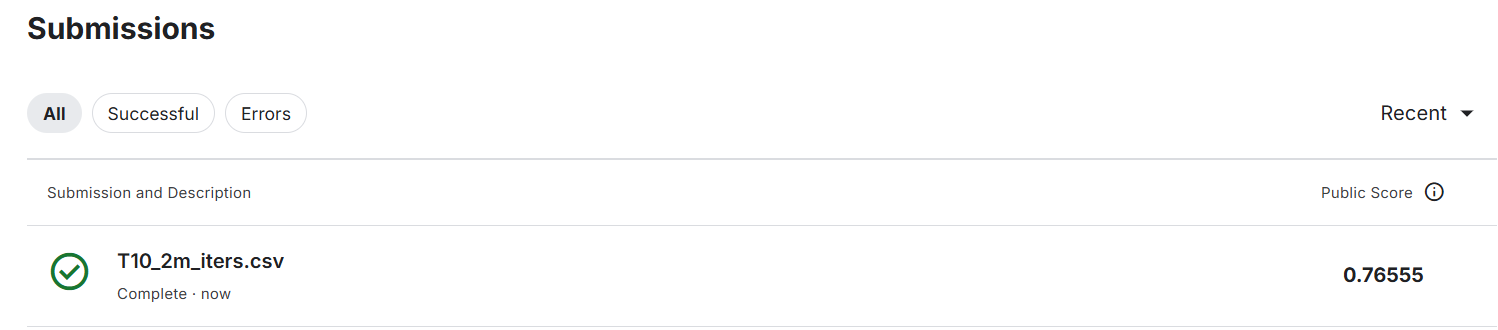

### T12.

In [13]:
train_high = train.copy()
train_high["Embarked**2"] = train_high["Embarked"] ** 2
train_high["Age*Pclass"] = train_high["Age"] * train_high["Pclass"]
train_high["Age**2"] = train_high["Age"] ** 2
train_high["Age*Sex"] = train_high["Age"] * train_high["Sex"]

test_high = test.copy()
test_high["Embarked**2"] = test_high["Embarked"] ** 2
test_high["Age*Pclass"] = test_high["Age"] * test_high["Pclass"]
test_high["Age**2"] = test_high["Age"] ** 2
test_high["Age*Sex"] = test_high["Age"] * test_high["Sex"]

In [14]:
lr = LogisticRegression(train_high, test_high, ["Pclass","Sex","Age","Embarked", "Embarked**2", "Age*Pclass", "Age**2", "Age*Sex"], "Survived",iters=100000)
lr.fit()
lr.params()
lr.predict(title="T12_100k_iters")

C:\Users\chyut\AppData\Local\Temp\ipykernel_22544\3690440150.py:39: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


trained with learning rate: 0.001 and iterations: 100000
[[-0.52522612]
 [-2.49243163]
 [ 2.86031408]
 [ 0.8270162 ]
 [ 0.7425793 ]
 [-1.47554321]
 [ 0.01012895]
 [ 7.54272117]]
Saved to submission/T12_100k_iters.csv


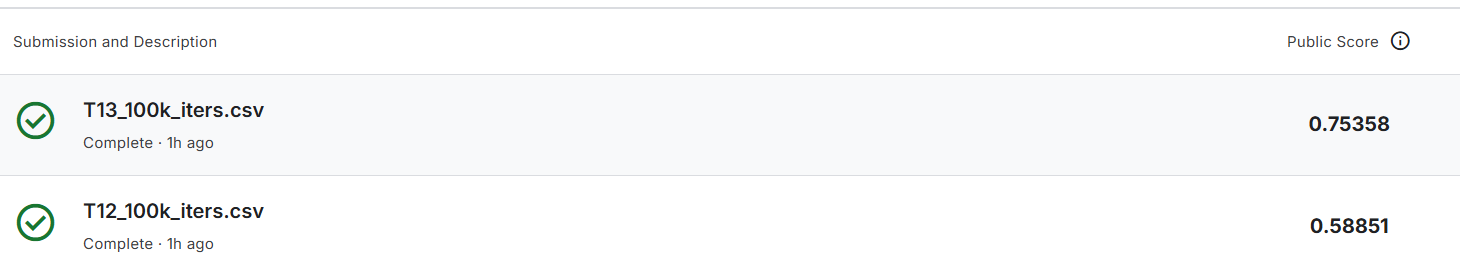

### T13.

In [15]:
lr = LogisticRegression(train_high, test_high, ["Age", "Sex"], "Survived",iters=100000)
lr.fit()
lr.params()
lr.predict(title="T13_100k_iters")

trained with learning rate: 0.001 and iterations: 100000
[[-0.04000972]
 [ 2.21648735]]
Saved to submission/T13_100k_iters.csv


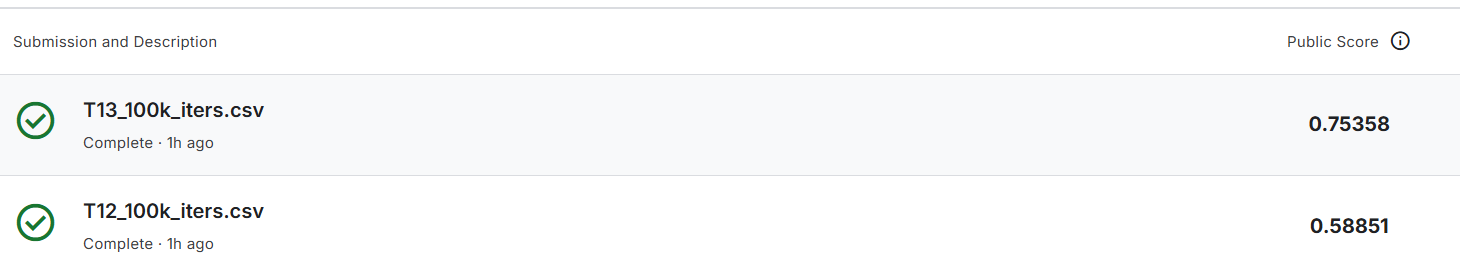

### OT3.

In [16]:
import pandas as pd
import numpy as np
import os

class LinearRegression:
    def __init__(self, train, test, feature_cols, target_col, learning_rate=0.001, iters=100000, threshold=0.5):
        self.train = train
        self.test = test
        self.feature_cols = feature_cols
        self.target_col = target_col
        self.learning_rate = learning_rate
        self.iters = iters
        self.threshold = threshold
        self.theta = np.zeros((len(self.feature_cols), 1)) # column vector
    
    def fit(self):
        self.process()
        x = np.array(self.train[self.feature_cols].values)
        y = np.array(self.train[self.target_col].values).reshape(-1, 1)
        for i in range(self.iters):
            self.theta += self.learning_rate / x.shape[0] * (x.T @ (y - (x @ self.theta)))

        print(f"trained with learning rate: {self.learning_rate} and iterations: {self.iters}")

    def params(self):
        print(self.theta)
        return self.theta

    def process(self):
        self.train["Age"] = self.train["Age"].fillna(self.train["Age"].median())
        self.test["Age"] = self.test["Age"].fillna(self.train["Age"].median())
        
        self.train.loc[self.train["Embarked"] == "S", "Embarked"] = 0
        self.train.loc[self.train["Embarked"] == "C", "Embarked"] = 1
        self.train.loc[self.train["Embarked"] == "Q", "Embarked"] = 2

        self.test.loc[self.test["Embarked"] == "S", "Embarked"] = 0
        self.test.loc[self.test["Embarked"] == "C", "Embarked"] = 1
        self.test.loc[self.test["Embarked"] == "Q", "Embarked"] = 2

        self.train["Embarked"] = self.train["Embarked"].fillna(self.train["Embarked"].mode().iloc[0])
        self.test["Embarked"] = self.test["Embarked"].fillna(self.train["Embarked"].mode().iloc[0])

        self.train.loc[self.train["Sex"] == "male", "Sex"] = 0
        self.train.loc[self.train["Sex"] == "female", "Sex"] = 1
        
        self.test.loc[self.test["Sex"] == "male", "Sex"] = 0
        self.test.loc[self.test["Sex"] == "female", "Sex"] = 1
        # print(self.test[self.feature_cols].dtypes)

        self.train[self.feature_cols] = self.train[self.feature_cols].astype(float)
        self.test[self.feature_cols] = self.test[self.feature_cols].astype(float)

In [17]:
lr = LinearRegression(train, test, ["Pclass","Sex","Age","Embarked"], "Survived",iters=1000000)
lr.fit()
theta_ot3 = lr.params()

trained with learning rate: 0.001 and iterations: 1000000
[[-0.01411427]
 [ 0.60420619]
 [ 0.00501483]
 [ 0.06116326]]


### OT4.


In [18]:
x = np.array(train[["Pclass","Sex","Age","Embarked"]])
y = np.array(train["Survived"]).reshape((-1, 1))
theta_ot4 = np.linalg.inv(x.T @ x) @ (x.T @ y) 
theta_ot4

array([[-0.01411427],
       [ 0.60420619],
       [ 0.00501483],
       [ 0.06116326]])

In [19]:
mse = np.sum((theta_ot3 - theta_ot4) ** 2) / theta_ot3.shape[1]
mse

np.float64(5.471194131828056e-26)